In [99]:
import random
import seaborn as sns
import  matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

In [114]:
num_of_deck=1
def cards_deck(num_of_deck=num_of_deck):
    """Returns the full  shuffeled deck """
    std_deck=[ 1,2, 3, 4, 5, 6, 7, 8, 9, 10,10,10,10,
               1,2, 3, 4, 5, 6, 7, 8, 9, 10,10,10,10,
               1,2, 3, 4, 5, 6, 7, 8, 9, 10,10,10,10,
               1,2, 3, 4, 5, 6, 7, 8, 9, 10,10,10,10          
             ]
    
    std_deck =std_deck*num_of_deck
    random.shuffle(std_deck)
    return std_deck
print(cards_deck(2))

[8, 1, 4, 10, 2, 9, 4, 6, 10, 6, 9, 2, 10, 8, 1, 6, 5, 10, 3, 10, 8, 10, 6, 9, 6, 1, 4, 7, 10, 10, 3, 7, 10, 6, 5, 9, 8, 3, 5, 9, 2, 7, 8, 10, 10, 1, 10, 2, 10, 4, 10, 1, 6, 10, 10, 10, 1, 4, 3, 9, 5, 10, 10, 10, 3, 9, 1, 5, 7, 10, 10, 5, 9, 8, 10, 2, 10, 7, 10, 7, 10, 8, 10, 10, 4, 3, 4, 10, 3, 2, 7, 6, 3, 10, 8, 5, 10, 7, 5, 10, 4, 2, 2, 1]


In [19]:
def count(cards_hand):
    """Return the sum of the card in hands with blackjack rule"""
    not_aces=[card for card in cards_hand if card != 1 ]
    aces=[card for card in cards_hand if card == 1]
    total=0
    
    for card in not_aces:
        total+=card
        
    for card in aces:
        if total <= 10:
            total +=11
        else:
            total +=1
    return total

In [178]:
def play_hand(deck):
    """Takes deck or card/card Returns tuple of win/loss/tie,
    player,dealer_hand  (1= player win , 0= tie , -1 = player loose"""

    new_deck=deck
    dealer_hand=[]
    player_hand=[]
        
    player_hand.append(new_deck.pop())
    dealer_hand.append(new_deck.pop())
    player_hand.append(new_deck.pop())
    dealer_hand.append(new_deck.pop()) 
 
    # deal player to 12 or higher
    
    #both dealer and plater has blackjack(21)
    if ((count(dealer_hand) ==21) and (count(player_hand)==21) ):
        return (0,player_hand,dealer_hand)
   
    #dealer has blackjack and player does not 
    elif ((count(dealer_hand) ==21) and (count(player_hand) !=21) ):
        return (-1,player_hand,dealer_hand)
    
    #player has blackjack and dealer does not 
    elif ((count(dealer_hand) !=21) and (count(player_hand) ==21) ):
        return (1,player_hand,dealer_hand)
    
    #neither dealer nor player have blackjack(21) with first 2 cards
    
    else:
        while count(player_hand) < 17:
            player_hand.append(new_deck.pop())

        #dealer must hit soft 17
    while count(dealer_hand) < 17:
        exit=False
        
        if count(dealer_hand)== 17:
            exit= True
            
            for i, card in enumerate(dealer_hand):
                
                if card==11:
                    exit=False
                    dealer_hand[1]=1
                    
        if exit:
            break
            
        dealer_hand.append(new_deck.pop())
        
    #return(p_sum,d_sum,player_hand,dealer_hand)
        
    p_sum=count(player_hand)
    d_sum=count(dealer_hand)
    
    #player bust
    if p_sum >=22 :
        return (-1,player_hand,dealer_hand);
    # dealer bust
    if d_sum >21:
        return (1,player_hand,dealer_hand);
    #dealer tie
    if d_sum == p_sum:
        return (0,player_hand,dealer_hand);
    #dealer win
    if d_sum > p_sum:
        return (-1,player_hand,dealer_hand);

    #dealer loose
    if d_sum < p_sum:
        return (1,player_hand,dealer_hand);

In [179]:
# create the empty csv filw named status had headed win draw and loss:
header_name=["win","draw","loss"]
with open('status.csv', 'w') as file:
    writer = csv.DictWriter(file, fieldnames=header_name)
    writer.writeheader()

In [180]:
win=0
draw=0
loss=0

win_loss=[]
player_cards=[]
dealer_cards=[]

rounds=100000
num_of_deck= 8
gtype="dealerhit17"
deck=cards_deck(num_of_deck=num_of_deck)
total_card=len(deck)  

deck=cards_deck(num_of_deck)
play_hand(deck)

for i in range(rounds):
    if len(deck)> (total_card*20)/100:
        try:  
            wl,ph,dh= play_hand(deck)
            win_loss.append(wl)
            player_cards.append(ph)
            dealer_cards.append(dh)
            
            if wl==1:
                win=win+1
            if wl==0:
                draw=draw+1
            if wl== -1:
                loss=loss+1
                
            with open('status.csv', 'a') as file:
                
                writer = csv.DictWriter(file, fieldnames=header_name)
                info = {'win': win,'draw': draw,'loss': loss}                            
                writer.writerow(info)           
            
        except IndexError:
            deck=cards_deck(num_of_deck=num_of_deck)
    else:
        #print("Shuffeling the card")
        deck=cards_deck(num_of_deck=num_of_deck)

#creating dataframe         
df=pd.DataFrame()
df["win_loss"]=win_loss
df["player_cards"]=player_cards
df["dealer_cards"]=dealer_cards
#Saving Dt to Datarame folder
df.to_csv(f"dataframes/{str(num_of_deck)+gtype}.csv",index= False)

# Analyzing the outcome

In [181]:
df=pd.read_csv(f"dataframes/{str(num_of_deck)+gtype}.csv")
df.shape

(98324, 3)

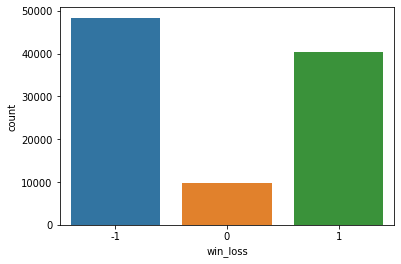

In [182]:
sns.countplot(df.win_loss)
plt.show()

In [183]:
win_percentage=df[df.win_loss==1].shape[0]*100/len(df)
loss_percentage=df[df.win_loss==-1].shape[0]*100/len(df)
draw_percentage=df[df.win_loss==0].shape[0]*100/len(df)

print(f"Win percentage: {int(win_percentage)} %")
print(f"Loss percentage: {int(loss_percentage)} %")
print(f"Draw percentage: {int(draw_percentage)} %")

Win percentage: 41 %
Loss percentage: 49 %
Draw percentage: 9 %


In [184]:
df.sample(n=20)

,win_loss,player_cards,dealer_cards
10446,-1,"[3, 3, 10, 10]","[2, 6, 10]"
63242,1,"[10, 8]","[10, 7]"
42126,-1,"[5, 5, 9]","[9, 2, 10]"
75314,-1,"[5, 10, 4]","[10, 10]"
78096,1,"[2, 6, 8, 3]","[2, 6, 4, 5]"
92884,-1,"[10, 10]","[10, 1]"
54045,1,"[7, 5, 7]","[9, 6, 3]"
59360,-1,"[10, 3, 10]","[10, 10]"
73298,1,"[6, 6, 9]","[3, 5, 6, 2, 2]"
67753,-1,"[6, 10, 7]","[10, 10]"


In [154]:
df["player_cards"]=df.player_cards.str.replace("]","").str.replace("[","")
df["dealer_cards"]=df.dealer_cards.str.replace("]","").str.replace("[","")

players_df=df.player_cards.str.split(",",expand=True)
players_df.columns=["ph"+str(col+1) for col in  players_df.columns]

dealers_df=df.dealer_cards.str.split(",",expand=True)
dealers_df.columns=["dh"+str(col+1) for col in  dealers_df.columns]

df.drop(columns=["player_cards","dealer_cards"],inplace=True)

new_df=pd.concat([df,players_df,dealers_df],axis=1)

new_df.replace(np.nan,0,inplace=True)


In [170]:
count([1,7])

18